# Actividad Evaluable Mapas de calor y boxplots

In [37]:
print("Integrantes Equipo 4\n")

print("Jesús Dassaef López Barrios      A01366815")
print("Pablo Enrique Martínez Sánchez   A01706352")
print("Carlos Iñaki Román Martinez      A01702712")

Integrantes Equipo 4

Jesús Dassaef López Barrios      A01366815
Pablo Enrique Martínez Sánchez   A01706352
Carlos Iñaki Román Martinez      A01702712


Preguntas relevantes
------------------------------

a) En una partida con un número extenso de movimientos (turns >= 100), ¿con qué color de piezas es más probable ganar?

b) En promedio, ¿con qué rating se gana más con negras y con blancas? (general) -> Basándonos en: What allows a player to win as black or white?

c) ¿Cuáles son las 5 aperturas con las que se gana más en una pártida con negras y con blancas?

d) ¿Con qué color de pieza se gana más?

e) ¿Cuál es el estatus de victoria más común?


In [38]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
data = pd.read_csv('gamesChess.csv')
import matplotlib as mpl
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
# Revisar dimensiones
data.shape

(20058, 16)

Número general de datos: 20058
Número general de columnas (variables en nuestro caso): 16

In [39]:
data.head() # Mostrar el inicio de los datos generales

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.500000e+12,1.500000e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.500000e+12,1.500000e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.500000e+12,1.500000e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.500000e+12,1.500000e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.500000e+12,1.500000e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


In [40]:
data.describe() # Descripción general de parámetros estadísticos

,created_at,last_move_at,turns,white_rating,black_rating,opening_ply
count,2.005800e+04,2.005800e+04,20058.000000,20058.000000,20058.000000,20058.000000
mean,1.483208e+12,1.483208e+12,60.465999,1596.631868,1588.831987,4.816981
std,2.831972e+10,2.831967e+10,33.570585,291.253376,291.036126,2.797152
min,1.376770e+12,1.376770e+12,1.000000,784.000000,789.000000,1.000000
25%,1.479640e+12,1.479642e+12,37.000000,1398.000000,1391.000000,3.000000
50%,1.497030e+12,1.497030e+12,55.000000,1567.000000,1562.000000,4.000000
75%,1.500708e+12,1.500708e+12,79.000000,1793.000000,1784.000000,6.000000
max,1.504490e+12,1.504490e+12,349.000000,2700.000000,2723.000000,28.000000


# Visualización general

In [41]:
df_f0 = data.drop(columns=['id','created_at','last_move_at','increment_code','white_id','black_id','moves','opening_eco'])
df_f0

,rated,turns,victory_status,winner,white_rating,black_rating,opening_name,opening_ply
0,False,13,outoftime,white,1500,1191,Slav Defense: Exchange Variation,5
1,True,16,resign,black,1322,1261,Nimzowitsch Defense: Kennedy Variation,4
2,True,61,mate,white,1496,1500,King's Pawn Game: Leonardis Variation,3
3,True,61,mate,white,1439,1454,Queen's Pawn Game: Zukertort Variation,3
4,True,95,mate,white,1523,1469,Philidor Defense,5
...,...,...,...,...,...,...,...,...
20053,True,24,resign,white,1691,1220,Dutch Defense,2
20054,True,82,mate,black,1233,1196,Queen's Pawn,2
20055,True,35,mate,white,1219,1286,Queen's Pawn Game: Mason Attack,3
20056,True,109,resign,white,1360,1227,Pirc Defense,4


Eliminamos las columnas que contienen las variables que no nos interesan analizar.

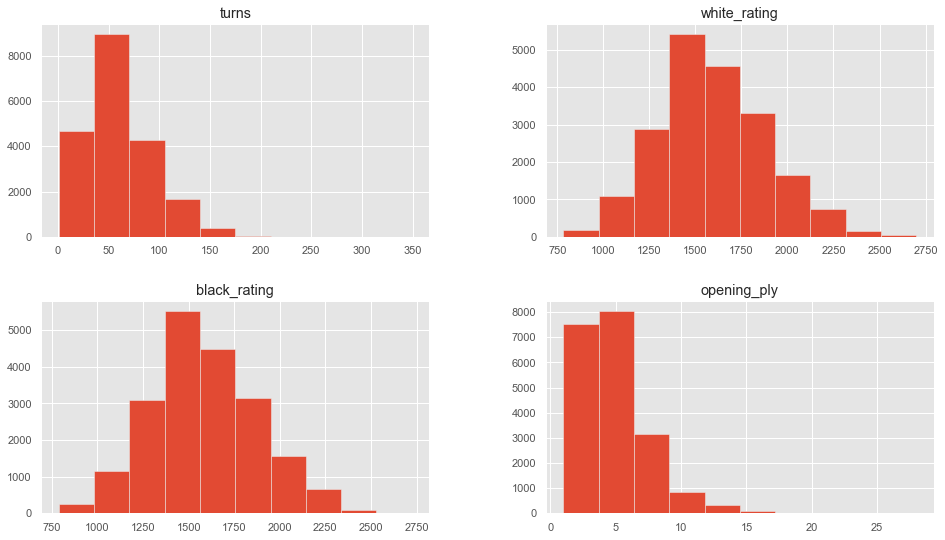

In [42]:
df_f0.drop(columns=['victory_status','winner','opening_name','rated']).hist()
plt.show()

Impresiones de histogramas generales

# Mapas de calor y boxplots

In [43]:
df_1 = df_f0.drop(columns=['rated','victory_status','winner','white_rating','black_rating','opening_name','opening_ply'])
df_1

,turns
0,13
1,16
2,61
3,61
4,95
...,...
20053,24
20054,82
20055,35
20056,109


In [44]:
mediana_turns = df_1["turns"].median()
media_turns   = df_1["turns"].mean()
moda_turns    = df_1["turns"].mode().max()
std_turns     = df_1["turns"].std()
min_turns     = df_1["turns"].min()
max_turns     = df_1["turns"].max()

print("Mediana turns      :",mediana_turns)
print("Media turns        :",media_turns)
print("Moda turns         :",moda_turns)
print("Desv. Est. turns   :",std_turns)
print("Valor mínimo turns :",min_turns)
print("Valor máximo turns :",max_turns)

df_1["turns"].describe()

Mediana turns      : 55.0
Media turns        : 60.46599860404826
Moda turns         : 53
Desv. Est. turns   : 33.570584753537055
Valor mínimo turns : 1
Valor máximo turns : 349


count    20058.000000
mean        60.465999
std         33.570585
min          1.000000
25%         37.000000
50%         55.000000
75%         79.000000
max        349.000000
Name: turns, dtype: float64

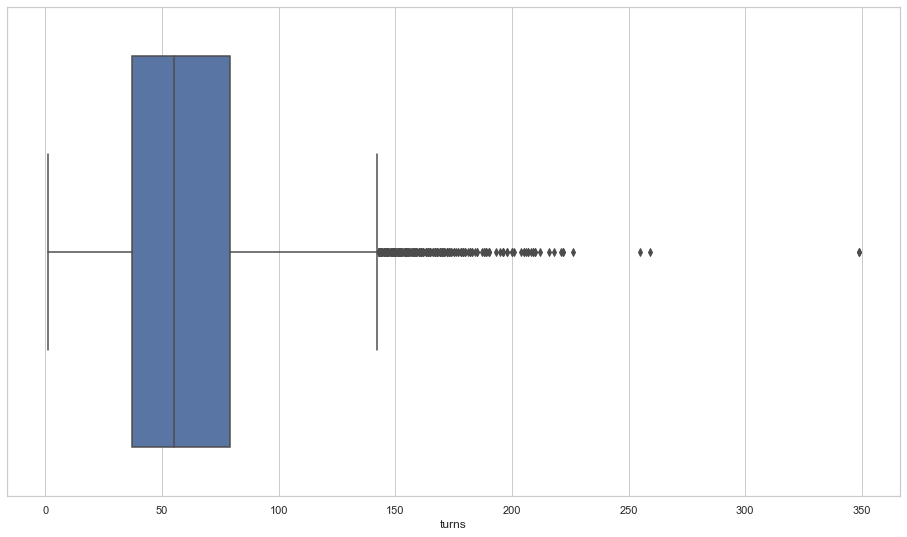

In [45]:
sb.set_theme(style="whitegrid")
ax_turns = sb.boxplot(x=df_1["turns"])

En conclusión podemos decir que hay un promedio de 60 movimientos por partida de ajedrez.

In [46]:
df_2 = df_f0.drop(columns=['rated','victory_status','winner','opening_name',])
df_2

,turns,white_rating,black_rating,opening_ply
0,13,1500,1191,5
1,16,1322,1261,4
2,61,1496,1500,3
3,61,1439,1454,3
4,95,1523,1469,5
...,...,...,...,...
20053,24,1691,1220,2
20054,82,1233,1196,2
20055,35,1219,1286,3
20056,109,1360,1227,4


In [47]:
df_2.corr(method= 'pearson')

,turns,white_rating,black_rating,opening_ply
turns,1.000000,0.129753,0.160467,0.055999
white_rating,0.129753,1.000000,0.634171,0.277379
black_rating,0.160467,0.634171,1.000000,0.255396
opening_ply,0.055999,0.277379,0.255396,1.000000


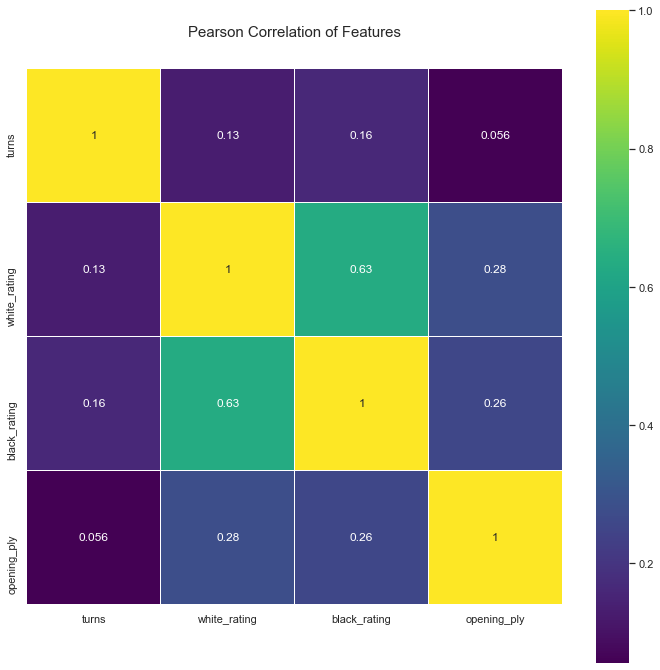

In [48]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sb.heatmap(df_2.astype(float).corr(),linewidths=0.1, square=True, cmap=colormap, linecolor='white', annot=True);

En conclusión, el mapa de calor nos permite observar la relacón entre las variables que permiten conseguir una victoria en una partida de ajedrez.

¿Hay alguna variable que no aporta información?
----------------------------------------------------------------------

En nuestro caso, estas son las variables/columnas de nuestra base de datos:

(id	rated	created_at	last_move_at	turns	victory_status	winner	increment_code	white_id	white_rating	black_id	black_rating	moves	opening_eco	opening_name	opening_ply)

De acuerdo a los resultados arrojados por los análisis encontramos que el [id], [created at], [last_move_at], [increment_code], [white_id],  [black_id], [moves], [opening_eco] y [opening_ply] no son variables que necesitemos o afecten directamente nuestro análisis (no son requeridas o no aportan información relevante).

Si tuvieras que eliminar variables, ¿cuáles quitarías y por qué?
---------------------------------------------------------------------------------

De igual forma, encontramos que las variables mencionadas en la pregunta anterior no aportan información de acuerdo al análisis o simplemente no son relevantes para lo que queremos responder en las preguntas finales (reto).

¿Existen variables que tengan datos extraños?
------------------------------------------------------------------------

En nuestro caso, serían las siguientes variables: [created at] y [last_move_at].

Consideramos estas variables cómo extrañas, pues no pudimos interpretar correctamente sus valores para incluirlas en el análisis.

Si comparas las variables, ¿todas están en rangos similares? ¿Crees que esto afecte?
------------------------------------------------------------------------

En realidad, todas nuestras variables/columnnas tienen tipos de datos distintos: float, integer, bool, texto (variable en formato); sin embargo, sí podemos realizar todo tipo de análisis si los renombramos y reinterpretamos.

¿Puedes encontrar grupos qué se parezcan? ¿Qué grupos son estos?
------------------------------------------------------------------------

Debido a que los tipos de datos son muy específicos, es entonces que podemos agrupar los tipos de datos de texto binario (reinterpretarlos y convertirlos a int o float) con otras variables de tipo numérico por ejemplo. Simplemente hay que observar las relaciones que planteamos para responder las preguntas del reto para darnos cuenta que cualquier variable se puede asociar con otra si es que las interpretamos correctamente.

Otros ejemplos:

- turns y winner
- winner, white_rating y black_rating
- winner y opening_name

Entre otras.


# Respuesta de preguntas

## a) En una partida con un número extenso de movimientos (turns >= 100), ¿con qué color de piezas es más probable ganar?

In [49]:
df_a = df_f0.drop(columns=['rated','victory_status','white_rating','black_rating','opening_name','opening_ply'])
df_a

,turns,winner
0,13,white
1,16,black
2,61,white
3,61,white
4,95,white
...,...,...
20053,24,white
20054,82,black
20055,35,white
20056,109,white


In [50]:
df_A=df_a[df_a['turns'] >= 100]
df_A

,turns,winner
9,119,white
18,101,black
76,131,white
85,114,white
98,113,draw
...,...,...
20023,107,black
20024,118,black
20028,115,white
20034,100,draw


In [51]:
black_a=0
white_a=0
# draw_a=0

for i in df_A.index:
    if (df_A["winner"][i] == "black"): black_a+=1;
    if (df_A["winner"][i] == "white"): white_a+=1;
    # if (df_A["winner"][i] == "draw"):  draw_a+=1;

print("White winner: "+ str(white_a))
print("Black winner: "+ str(black_a))
# print(white_a+black_a+draw_a)

White winner: 1093
Black winner: 1131


Contamos las veces que un jugador gana con blancas o negras en una partida mayor o igual de 100 turns.

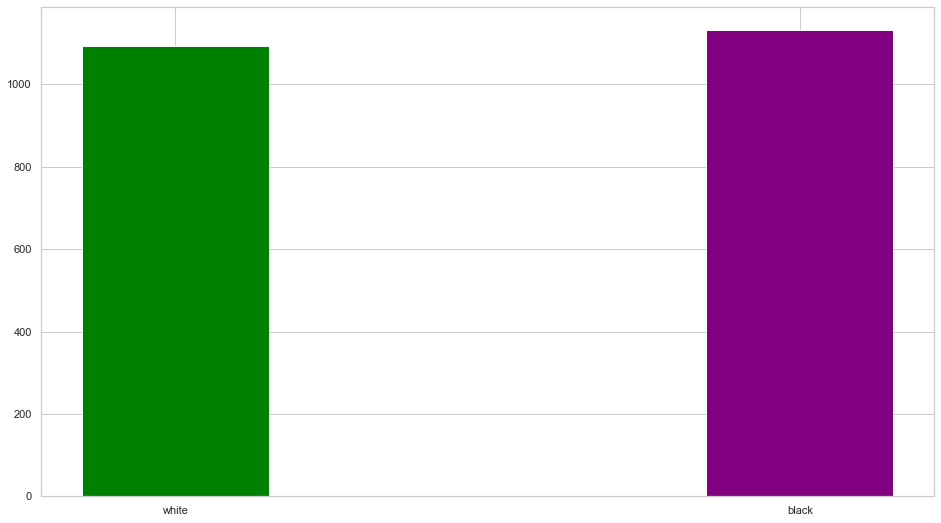

In [52]:
x=['white','black']
y=[white_a,black_a]
mpl.pyplot.bar(x, y, width=0.3, bottom=None, align='center',color=['green','purple']);

Concluimos que a pesar de que en promedio un jugador tiene más probabilidades de ganar un partida cualquiera con las piezas blancas, en una partida 'larga', en nuestro caso de mayor o igual a 100 turns, las piezas negras ganan más, por lo que un jugador con las piezas negras en una partida de más de 100 turns tiene más probabilidades de obtener la victoria. 

## b) En promedio, ¿con qué rating se gana más con negras y con blancas? (general) -> Basándonos en: What allows a player to win as black or white?

In [53]:
df_b = df_f0.drop(columns=['rated','turns','victory_status','opening_name','opening_ply'])
df_b

,winner,white_rating,black_rating
0,white,1500,1191
1,black,1322,1261
2,white,1496,1500
3,white,1439,1454
4,white,1523,1469
...,...,...,...
20053,white,1691,1220
20054,black,1233,1196
20055,white,1219,1286
20056,white,1360,1227


In [54]:
# Filtro de ganadores con blancas

df_b_W = df_b[df_b['winner'] == 'white']
df_b_W

,winner,white_rating,black_rating
0,white,1500,1191
2,white,1496,1500
3,white,1439,1454
4,white,1523,1469
6,white,1520,1423
...,...,...,...
20050,white,1243,1142
20052,white,1219,1250
20053,white,1691,1220
20055,white,1219,1286


In [55]:
mediana_white_rating_W = df_b_W["white_rating"].median()
media_white_rating_W   = df_b_W["white_rating"].mean()
min_white_rating_W     = df_b_W["white_rating"].min()
max_white_rating_W     = df_b_W["white_rating"].max()

media_black_rating_W   = df_b_W["black_rating"].mean()

print("Mediana white_rating_W      :",mediana_white_rating_W)
print("Media white_rating_W        :",media_white_rating_W)
print("Media black_rating_W        :",media_black_rating_W)
print("Valor mínimo white_rating_W :",min_white_rating_W)
print("Valor máximo white_rating_W :",max_white_rating_W)

print("Diferencia de rating promedio entre ganador (WHITE) y perdedor:",media_white_rating_W-media_black_rating_W)

df_b_W["white_rating"].describe()

Mediana white_rating_W      : 1603.0
Media white_rating_W        : 1634.1841815818418
Media black_rating_W        : 1538.876712328767
Valor mínimo white_rating_W : 784
Valor máximo white_rating_W : 2700
Diferencia de rating promedio entre ganador (WHITE) y perdedor: 95.30746925307471


count    10001.000000
mean      1634.184182
std        290.360578
min        784.000000
25%       1436.000000
50%       1603.000000
75%       1822.000000
max       2700.000000
Name: white_rating, dtype: float64

Podemos observar que en una partida cuando ganan las blancas, en promedio estas tienen un rating de casi 100 puntos más que las negras. En resumen, blancas ganan cuando en promedio tienen un rating mayor.

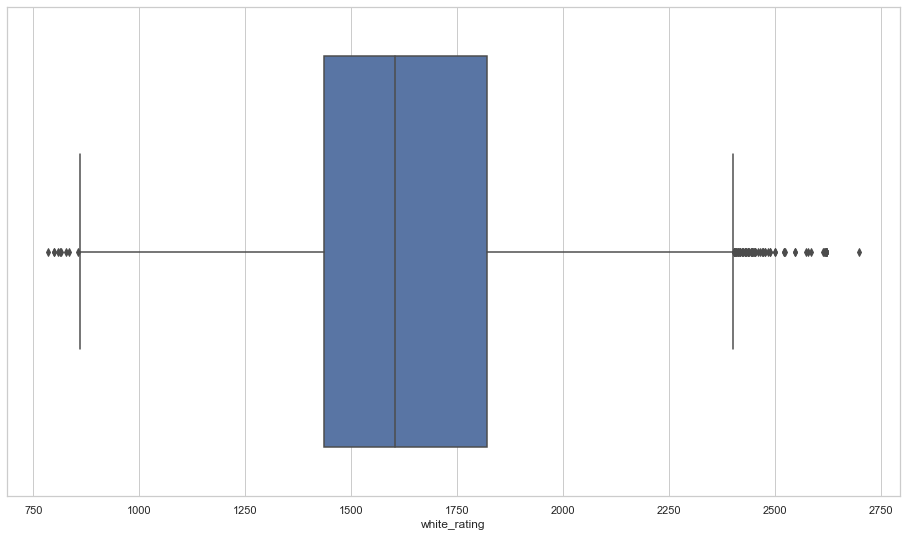

In [56]:
sb.set_theme(style="whitegrid")
ax_W = sb.boxplot(x=df_b_W["white_rating"])

In [57]:
# Filtro de ganadores con negras

df_b_B = df_b[df_b['winner'] == 'black']
df_b_B

,winner,white_rating,black_rating
1,black,1322,1261
7,black,1413,2108
8,black,1439,1392
11,black,1381,1867
12,black,1381,1936
...,...,...,...
20041,black,1263,1770
20046,black,1250,1235
20051,black,1237,1231
20054,black,1233,1196


In [58]:
mediana_black_rating_B = df_b_B["black_rating"].median()
media_black_rating_B   = df_b_B["black_rating"].mean()
min_black_rating_B     = df_b_B["black_rating"].min()
max_black_rating_B     = df_b_B["black_rating"].max()

media_white_rating_B   = df_b_B["white_rating"].mean()

print("Mediana black_rating_B      :",mediana_black_rating_B)
print("Media black_rating_B        :",media_black_rating_B)
print("Media white_rating_B        :",media_white_rating_B)
print("Valor mínimo black_rating_B :",min_black_rating_B)
print("Valor máximo black_rating_B :",max_black_rating_B)

print("Diferencia de rating promedio entre ganador (BLACK) y perdedor:",media_black_rating_B-media_white_rating_B)

df_b_B["black_rating"].describe()

Mediana black_rating_B      : 1609.0
Media black_rating_B        : 1638.227297683101
Media white_rating_B        : 1549.2461842538708
Valor mínimo black_rating_B : 789
Valor máximo black_rating_B : 2621
Diferencia de rating promedio entre ganador (BLACK) y perdedor: 88.98111342923016


count    9107.000000
mean     1638.227298
std       289.835927
min       789.000000
25%      1438.500000
50%      1609.000000
75%      1828.000000
max      2621.000000
Name: black_rating, dtype: float64

Podemos observar que en una partida cuando ganan las negras, en promedio estas tienen un rating de casi 90 puntos más que las blancas. En resumen, negras ganan cuando en promedio tienen un rating mayor.

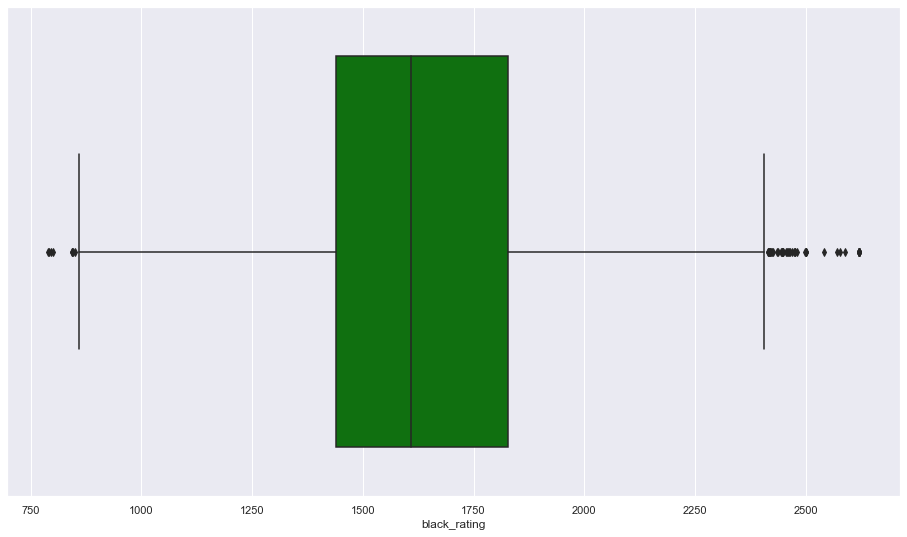

In [59]:
sb.set_theme(style="darkgrid")
ax_B = sb.boxplot(x=df_b_B["black_rating"],color='green')

Finalmente, observamos que en promedio 1634.1841815818418 es el rating con el que es más común ganar si es que se es blancas. Por otro lado, 1638.227297683101 es el rating con el que es más común ganar si es que se es negras.

# c) ¿Cuáles son las 5 aperturas con las que se gana más en una pártida con negras y con blancas?

In [60]:
df_c = df_f0.drop(columns=['rated','turns','victory_status','white_rating','black_rating','opening_ply'])
df_c

,winner,opening_name
0,white,Slav Defense: Exchange Variation
1,black,Nimzowitsch Defense: Kennedy Variation
2,white,King's Pawn Game: Leonardis Variation
3,white,Queen's Pawn Game: Zukertort Variation
4,white,Philidor Defense
...,...,...
20053,white,Dutch Defense
20054,black,Queen's Pawn
20055,white,Queen's Pawn Game: Mason Attack
20056,white,Pirc Defense


In [61]:
vant_kruijs_opening=0
sicilian_defense=0
french_defense_knight_variation=0
sicilian_defense_bowdler_attack=0
scotch_game=0

for i in df_c.index:
    if (df_c["opening_name"][i] == "Van't Kruijs Opening"): vant_kruijs_opening+=1;
    if (df_c["opening_name"][i] == "Sicilian Defense"): sicilian_defense+=1;
    if (df_c["opening_name"][i] == "French Defense: Knight Variation"): french_defense_knight_variation+=1;
    if (df_c["opening_name"][i] == "Sicilian Defense: Bowdler Attack"): sicilian_defense_bowdler_attack+=1;
    if (df_c["opening_name"][i] == "Scotch Game"): scotch_game+=1;

print("Van't Kruijs Opening: "+ str(vant_kruijs_opening))
print("Sicilian Defense: "+ str(sicilian_defense))
print("French Defense: Knight Variation: "+ str(french_defense_knight_variation))
print("Sicilian Defense: Bowdler Attack: "+ str(sicilian_defense_bowdler_attack))
print("Scotch Game: "+ str(scotch_game))

Van't Kruijs Opening: 368
Sicilian Defense: 358
French Defense: Knight Variation: 271
Sicilian Defense: Bowdler Attack: 296
Scotch Game: 271


Basandonos en las tácticas de apertura, se determina la que más ha cosechado victorias en una partida de ajedrez.

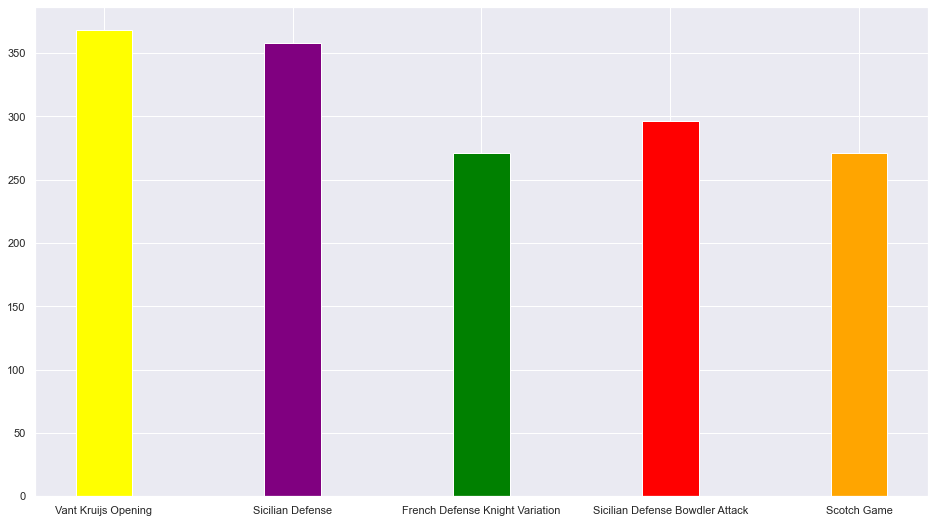

In [62]:
x=['Vant Kruijs Opening','Sicilian Defense','French Defense Knight Variation','Sicilian Defense Bowdler Attack','Scotch Game']
y=[vant_kruijs_opening,sicilian_defense,french_defense_knight_variation,sicilian_defense_bowdler_attack,scotch_game]
mpl.pyplot.bar(x, y, width=0.3, bottom=None, align='center',color=['yellow','purple','green','red','orange']);

Analizando nuestros resultados, podemos concluir que la apertura que tiene mayor número de victorias en una partida de ajedrez es la de Vant't Kruijs Opening.

# d) ¿Con qué color de pieza se gana más?

In [63]:
df_d = df_f0.drop(columns=['rated','turns','victory_status','white_rating','black_rating','opening_name','opening_ply'])
df_d

,winner
0,white
1,black
2,white
3,white
4,white
...,...
20053,white
20054,black
20055,white
20056,white


In [64]:
black_d=0
white_d=0
#draw_d=0

for i in df_d.index:
    if (df_d["winner"][i] == "black"): black_d+=1;
    if (df_d["winner"][i] == "white"): white_d+=1;
    #if (df_d["winner"][i] == "draw"):  draw_d+=1;

print("White winner: "+ str(white_d))
print("Black winner: "+ str(black_d))
#print(white_d+black_d+draw_d)

White winner: 10001
Black winner: 9107


Contamos las veces que un jugador gana con blancas o negras.

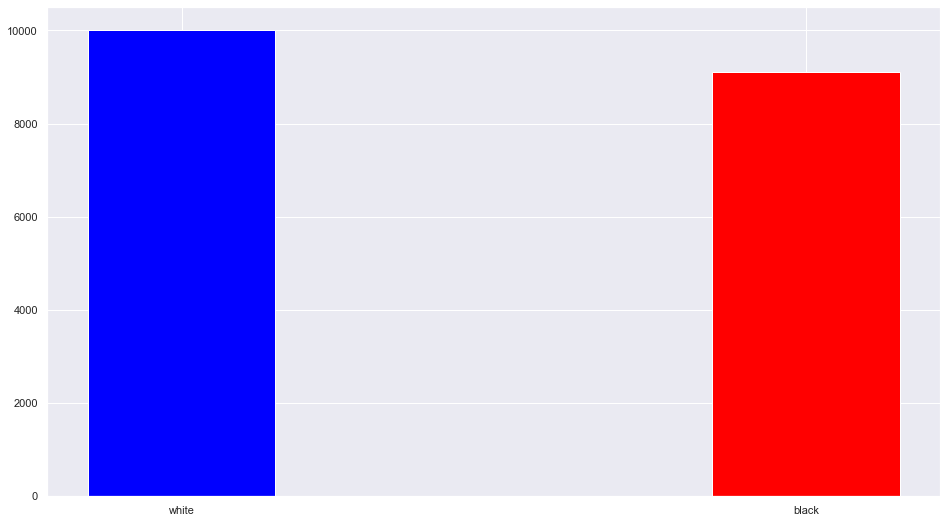

In [65]:
x=['white','black']
y=[white_d,black_d]
mpl.pyplot.bar(x, y, width=0.3, bottom=None, align='center',color=['blue','red']);

Analindo el gráfico podemos concluir que un jugador tiene más probabilidades de ganar un partida cualquiera con las piezas blancas, esto puede deberse al ser el primero en iniciar la partida de ajedrez.

## e) ¿Cuál es el estatus de victoria más común?

In [66]:
df_e = df_f0.drop(columns=['rated','turns','white_rating','black_rating','opening_name','opening_ply'])
df_e

,victory_status,winner
0,outoftime,white
1,resign,black
2,mate,white
3,mate,white
4,mate,white
...,...,...
20053,resign,white
20054,mate,black
20055,mate,white
20056,resign,white


In [67]:
# outoftime = 0, draw = 1, mate = 2, resign = 3
df_e_1 = df_e

outoftime = 0;
mate = 0;
resign = 0;
draw = 0;

for i in df_e_1.index:
    if (df_e_1["victory_status"][i] == "mate"): df_e_1["victory_status"][i] = '2';
    if (df_e_1["victory_status"][i] == "outoftime"): df_e_1["victory_status"][i] = '0';
    if (df_e_1["victory_status"][i] == "resign"): df_e_1["victory_status"][i] = '3';
    if (df_e_1["victory_status"][i] == "draw"): df_e_1["victory_status"][i] = '1';
        
for i in df_e_1.index:
    if (df_e_1["victory_status"][i] == '2'): mate+=1;
    if (df_e_1["victory_status"][i] == '0'): outoftime+=1;
    if (df_e_1["victory_status"][i] == '3'): resign+=1;
    if (df_e_1["victory_status"][i] == '1'): draw+=1;    

print("Out of time : "+ str(outoftime))
print("Mate        : "+ str(mate))
print("Resign      : "+ str(resign))
print("Draw        : "+ str(draw))

df_e_1

Out of time : 1680
Mate        : 6325
Resign      : 11147
Draw        : 906


,victory_status,winner
0,0,white
1,3,black
2,2,white
3,2,white
4,2,white
...,...,...
20053,3,white
20054,2,black
20055,2,white
20056,3,white


100 % = 20058

Out of time :  8.375710439724799 %
Mate        : 31.533552697178184 %
Resign      : 55.573835875959716 %
Draw        :  4.516900987137302 %


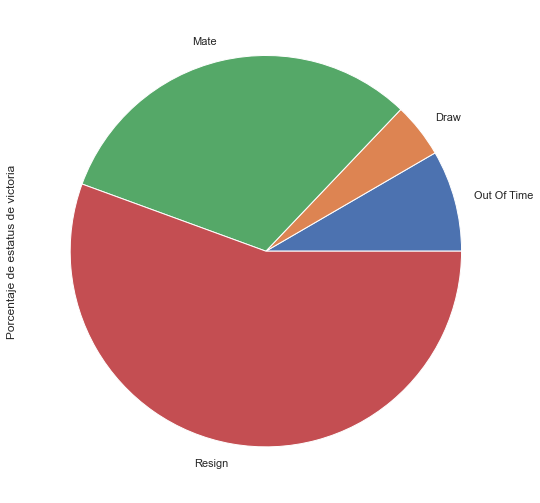

In [68]:
df_e_2 = pd.DataFrame(data={"VS":['Out Of Time','Draw','Mate','Resign'],
 "Porcentaje de estatus de victoria":[outoftime, draw, mate, resign]})

df_e_2.set_index('VS')['Porcentaje de estatus de victoria'].plot.pie();

print("100 % = 20058\n")
print("Out of time :  "+ str(outoftime*100/20058)+" %")
print("Mate        : "+ str(mate*100/20058)+" %")
print("Resign      : "+ str(resign*100/20058)+" %")
print("Draw        :  "+ str(draw*100/20058)+" %")

Concluimos que debido a que el estatus de victoria 'resign' es el más grande es porcentaje con 55.573835875959716%, este es el estatus de victoria más común.